<a href="https://colab.research.google.com/github/byeonguklee/Python/blob/main/02_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [5]:
data = pd.DataFrame(data, columns = columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data.shape

(506, 13)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2022)

In [8]:
X_train['RM'].values[:5]
# 방 개수만 가져오기를 하게 되면 1차원 (sklearn에서 2차원이상만 학습이 가능)

array([7.454, 6.315, 6.382, 5.942, 8.247])

In [9]:
# -1, 1의 비밀 ('-1' 끝점표현)
X_train['RM'].values.reshape(-1,1)[:5]

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

### Linear Regression (선형 회귀)

#### Simple Linear Regression (단순 선형 회귀)

In [10]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [11]:
sim_lr.fit(X_train['RM'].values.reshape((-1,1)), y_train)

LinearRegression()

In [12]:
y_pred = sim_lr.predict(X_test['RM'].values.reshape((-1,1)))

In [13]:
# 결과 살펴보기
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred))) 
#{:.4f} 소수점 4자리 실수(float 4자리)

단순 선형 회귀, R2: 0.2121


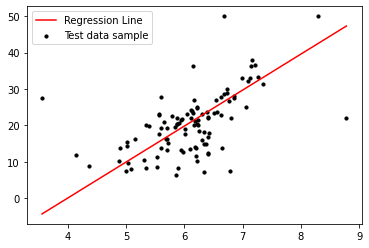

In [14]:
# 결과 시각화 하기

line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression Line', 'Test data sample'], loc='upper left')

#### Multiple Linear Regression (다중 선형 회귀)

In [15]:
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train) # 모든 columns을 사용

LinearRegression()

In [16]:
y_pred = mul_lr.predict(X_test)

In [17]:
print('다중 선형 회귀, r2: {:4f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, r2: 0.622569


### Decision Tree Regrssor (의사결정 트리 회귀)

In [18]:
from token import N_TOKENS
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=3) # tree의 단계 


#### Simple Decision Tree Regressor (단순 의사결정 트리 회귀)

---



In [19]:
dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape((-1,1)))

In [21]:
print('단순 결정 트리 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀, R2: 0.3931


In [22]:
# 단계를 반복문으로 해서 가장 높은 결과 값을 찾을 수 있다.

arr = np.arange(1, 11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth=depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
  y_pred = dt_regr.predict(X_test['RM'].values.reshape((-1,1)))
  
  print('단순 결정 트리 회귀 depth={}, R2: {:.4f}'.format(depth, r2_score(y_test, y_pred)))

단순 결정 트리 회귀 depth=1, R2: 0.2459
단순 결정 트리 회귀 depth=2, R2: 0.3547
단순 결정 트리 회귀 depth=3, R2: 0.3931
단순 결정 트리 회귀 depth=4, R2: 0.3816
단순 결정 트리 회귀 depth=5, R2: 0.3247
단순 결정 트리 회귀 depth=6, R2: 0.3474
단순 결정 트리 회귀 depth=7, R2: 0.3164
단순 결정 트리 회귀 depth=8, R2: 0.3368
단순 결정 트리 회귀 depth=9, R2: 0.3098
단순 결정 트리 회귀 depth=10, R2: 0.2579


In [24]:
# 반복문에 상수를 추가하여 어떤 단계가 가장 높은지 바로 확인할 수 있다.

best_depth = 0
best_r2 = 0

for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth=depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
  y_pred = dt_regr.predict(X_test['RM'].values.reshape((-1,1)))
  
  temp_r2 = r2_score(y_test, y_pred)
  print('단순 결정 트리 회귀 depth={}, R2: {:.4f}'.format(depth, r2_score(y_test, y_pred)))

  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('\n최적의 결과는 depth={}, r2={:.4f}'.format(best_depth, best_r2))

단순 결정 트리 회귀 depth=1, R2: 0.2459
단순 결정 트리 회귀 depth=2, R2: 0.3547
단순 결정 트리 회귀 depth=3, R2: 0.3931
단순 결정 트리 회귀 depth=4, R2: 0.3816
단순 결정 트리 회귀 depth=5, R2: 0.3247
단순 결정 트리 회귀 depth=6, R2: 0.3474
단순 결정 트리 회귀 depth=7, R2: 0.3164
단순 결정 트리 회귀 depth=8, R2: 0.3368
단순 결정 트리 회귀 depth=9, R2: 0.3098
단순 결정 트리 회귀 depth=10, R2: 0.2579

최적의 결과는 depth=3, r2=0.3931


#### Multiple Decision Tree Regressor (다중 의사결정 트리 회귀)


In [25]:
dt_regr = DecisionTreeRegressor(max_depth=8)
dt_regr.fit(X_train, y_train)

y_pred = dt_regr.predict(X_test)
print('다중 결정 트리 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 R2: 0.7223


### Support Vector machine Regressor (서포트 벡터 머신 회귀)

#### Single Support Vector Machine Regressor (단순 서포트 벡터 머신 회귀)

In [26]:
from sklearn.svm import SVR
svm_regr = SVR(C=5)

svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1))

print('단순 서포트 벡터 머신 회귀, R2:{:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀, R2:0.4049


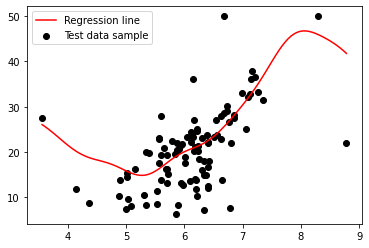

In [27]:
# 결과의 시각화

line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100)
line_y = svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line', 'Test data sample'], loc='upperleft')

#### Multiple Support Vector Machine Regrssor (다중 서포트 벡터 머신 회귀)

In [28]:
from sklearn.svm import SVR
svm_regr = SVR(C=225581)

svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)

print('다중 서포트 벡터 머신 회귀, R2:{:}'.format(r2_score(y_test, y_pred)))

다중 서포트 벡터 머신 회귀, R2:0.7601450425932866


In [29]:
arr = np.arange(1,10)

best_r2 = 0
best_C = 0

for cValue in arr:
  from sklearn.svm import SVR
  svm_regr = SVR(C=cValue)
  svm_regr.fit(X_train, y_train)
  y_pred = svm_regr.predict(X_test)
  temp_r2 = r2_score(y_test, y_pred)

  if best_r2 < temp_r2:
    best_r2 = temp_r2
    best_C = cValue

print('최고의 C 값은 {}, 이때의 R2 값은 {:.4f}'.format(best_C, best_r2))


최고의 C 값은 9, 이때의 R2 값은 0.3774
